In [209]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
import tensorflow_addons as tfa
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

In [210]:
os.listdir("/data2/training_data/summer/class")

['my_first_model.png',
 'valid.csv',
 'structured_data_classifier',
 'books_read.png',
 'catboost_info',
 'rgb_cube.gif',
 'test.csv',
 'model.png',
 'inhadr_tsne1.gif',
 'train.csv']

In [211]:
train = pd.read_csv("/data2/training_data/summer/class/train.csv")
print(train.shape)

(90000, 95)


In [212]:
train.columns

Index(['trn_id', 'target', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27',
       'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57',
       'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67',
       'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77',
       'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87',
       'x88', 'x89', 'x90', 'x91', 'x92'],
      dtype='object')

In [213]:
train['target'].unique()

array([0, 1, 2, 3])

In [214]:
a = np.where(train['target']==0,0,1)

In [215]:
print(a)

[0 0 0 ... 0 0 0]


In [216]:
b = np.where(train['target']==0)

In [217]:
train['target_new'] = np.where(train['target']==0,0,1)

In [218]:
train.drop(['target'],axis=1,inplace=True)

In [219]:
train.head()

,trn_id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x84,x85,x86,x87,x88,x89,x90,x91,x92,target_new
0,25769804069,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.222070,-0.192058,...,0.019762,-0.362267,-0.242739,-0.235990,-0.471266,0.832028,-0.068105,-0.516628,-0.110096,0
1,51539627562,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,1.354772,-0.192058,...,-0.529066,-0.362267,-0.242739,-0.235990,-0.866016,-1.064660,-0.292780,-0.011039,0.926921,0
2,51539632222,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.222070,-0.192058,...,-0.529066,-0.362267,-0.242739,-0.235990,-0.866016,-0.305985,-0.966803,-0.537647,0.151358,0
3,85899347721,0.978256,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.222070,-0.192058,...,0.843003,1.362445,1.346219,2.098925,-0.076516,1.970041,0.156569,-0.252870,0.667451,0
4,60129552698,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.222070,-0.192058,...,1.391831,-0.362267,-0.242739,-0.235990,1.897232,3.108055,2.852661,0.688391,0.079130,0


In [220]:
(train.isnull()).sum().sum()

0

In [221]:
train_numeric = train[train.select_dtypes(include=np.number).columns]

In [222]:
train_numeric.shape

(90000, 95)

In [223]:
train_numeric.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8,.9,.99,0.999,1],include = 'all').T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,99.9%,100%,max
trn_id,90000.0,6.411519e+10,3.974793e+10,3.000000,8.589949e+09,2.576981e+10,3.435976e+10,5.153962e+10,6.871948e+10,7.730943e+10,9.448929e+10,1.030792e+11,1.202591e+11,1.288490e+11,1.288490e+11,1.288490e+11,1.288490e+11
x0,90000.0,-1.626323e-03,9.489234e-01,-0.139764,-1.397639e-01,-1.397639e-01,-1.397639e-01,-1.397639e-01,-1.397639e-01,-1.397639e-01,-1.397639e-01,-1.397639e-01,-1.397639e-01,2.924871e+00,1.213699e+01,5.648397e+01,5.648397e+01
x1,90000.0,1.323820e-03,1.014494e+00,-0.193676,-1.936755e-01,-1.936755e-01,-1.936755e-01,-1.936755e-01,-1.936755e-01,-1.936755e-01,-1.936755e-01,-1.936755e-01,-1.936755e-01,5.009841e+00,1.216468e+01,2.127083e+01,2.127083e+01
x2,90000.0,6.584781e-04,1.007707e+00,-0.181769,-1.817691e-01,-1.817691e-01,-1.817691e-01,-1.817691e-01,-1.817691e-01,-1.817691e-01,-1.817691e-01,-1.817691e-01,-1.817691e-01,4.903532e+00,1.194472e+01,3.854476e+01,3.854476e+01
x3,90000.0,3.678196e-03,1.019274e+00,-0.175434,-1.754336e-01,-1.754336e-01,-1.754336e-01,-1.754336e-01,-1.754336e-01,-1.754336e-01,-1.754336e-01,-1.754336e-01,-1.754336e-01,5.021485e+00,1.268694e+01,1.268694e+01,1.268694e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x89,90000.0,2.762218e-03,1.001493e+00,-1.064660,-1.064660e+00,-1.064660e+00,-6.853227e-01,-3.059850e-01,-3.059850e-01,7.335276e-02,4.526905e-01,8.320282e-01,1.211366e+00,3.108055e+00,4.246068e+00,7.660107e+00,7.660107e+00
x90,90000.0,2.499710e-03,9.999056e-01,-1.416151,-1.416151e+00,-9.668027e-01,-5.174541e-01,-2.927798e-01,-6.810544e-02,1.565689e-01,6.059175e-01,8.305919e-01,1.279940e+00,2.627986e+00,3.302009e+00,4.650055e+00,4.650055e+00
x91,90000.0,1.834044e-03,1.003623e+00,-0.549921,-5.499213e-01,-5.466665e-01,-5.118488e-01,-4.484522e-01,-3.741024e-01,-2.732055e-01,-1.096752e-01,2.320688e-01,1.122442e+00,4.003008e+00,8.256507e+00,2.904571e+01,2.904571e+01
x92,90000.0,2.238250e-03,1.088766e+00,-1.090444,-1.090444e+00,-8.988857e-01,-3.166847e-01,-1.774952e-02,1.777763e-01,3.197775e-01,4.391250e-01,5.477812e-01,6.770544e-01,1.337604e+00,3.618152e+00,1.290123e+02,1.290123e+02


In [224]:
val = pd.read_csv("/data2/training_data/summer/class/valid.csv")
print(val.shape)

(29000, 95)


In [225]:
val.columns

Index(['trn_id', 'target', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27',
       'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57',
       'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67',
       'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77',
       'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87',
       'x88', 'x89', 'x90', 'x91', 'x92'],
      dtype='object')

In [226]:
val['target_new'] = np.where(val['target']==0,0,1)

In [227]:
val.drop('target',axis=1,inplace=True)

In [228]:
val.head()

,trn_id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x84,x85,x86,x87,x88,x89,x90,x91,x92,target_new
0,85899367663,0.571143,2.624896,0.209408,0.084412,0.579221,-0.200528,-0.205181,-0.22207,-0.192058,...,-0.254652,-0.362267,-0.242739,-0.23599,-0.076516,-1.064660,0.156569,-0.549921,-1.090444,0
1,25769819075,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.22207,-0.192058,...,-0.529066,-0.362267,-0.242739,-0.23599,1.107733,0.452690,1.279940,0.481754,0.376618,0
2,42949678495,4.868575,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.22207,-0.192058,...,0.019762,-0.362267,-0.242739,-0.23599,-0.076516,2.349379,-0.068105,-0.489725,-0.053143,1
3,77309428233,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.22207,-0.192058,...,1.666245,0.500089,-0.242739,-0.23599,0.712983,0.832028,1.279940,-0.460534,0.190330,0
4,103079219025,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.22207,-0.192058,...,-0.529066,0.500089,-0.242739,-0.23599,1.502482,1.970041,0.381243,0.150056,0.711405,0


In [229]:
(val.isnull()+0).sum().sum()

0

In [230]:
test = pd.read_csv("/data2/training_data/summer/class/test.csv")
print(test.shape)

(29580, 95)


In [231]:
(test.isnull()).sum().sum()

0

In [232]:
test.columns

Index(['trn_id', 'target', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27',
       'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57',
       'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67',
       'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77',
       'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87',
       'x88', 'x89', 'x90', 'x91', 'x92'],
      dtype='object')

In [233]:
test['target_new'] = np.where(test['target']==0,0,1)

In [234]:
test.drop('target',axis=1,inplace=True)

In [235]:
test.head()

,trn_id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x84,x85,x86,x87,x88,x89,x90,x91,x92,target_new
0,103079240809,-0.139764,4.142588,4.121178,0.863950,3.541409,0.569315,-0.104057,1.769983,6.310618,...,0.843003,0.500089,1.346219,2.098925,-0.076516,0.452690,1.055266,-0.506093,0.510818,0
1,25769806826,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.222070,-0.192058,...,0.568589,-0.362267,-0.242739,-0.235990,0.318233,-0.305985,0.605918,0.201414,0.504656,0
2,13692,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.222070,-0.192058,...,-0.529066,-0.362267,-0.242739,-0.235990,-1.655515,-1.064660,-1.416151,-0.549921,-1.090444,0
3,77309438191,-0.139764,-0.193676,-0.181769,-0.175434,-0.233929,-0.200528,-0.205181,-0.222070,-0.192058,...,-0.529066,-0.362267,-0.242739,-0.235990,-0.471266,0.452690,0.381243,-0.382239,-0.094009,0
4,42949679020,-0.139764,3.275335,0.991762,-0.045511,1.101960,-0.200528,-0.205181,-0.061266,3.601170,...,-0.254652,-0.362267,-0.242739,-0.235990,1.107733,1.211366,-0.068105,-0.546675,-0.023040,0


In [236]:
frames = [train,test]
X = pd.concat(frames)

In [237]:
train.shape

(90000, 95)

In [238]:
test.shape

(29580, 95)

In [239]:
X.shape

(119580, 95)

## Train Data

In [240]:
X_train = X.drop('target_new',axis=1)
y_train = X['target_new']

In [241]:
X_train.shape

(119580, 94)

## Test Data

In [242]:
X_test = val.drop('target_new',axis=1)
y_test = val['target_new']

In [243]:
X_test.shape

(29000, 94)

In [244]:
y_test.unique()

array([0, 1])

In [245]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

## Feedforward Neural Network

In [246]:
inputs = tf.keras.Input(shape=(94,))
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(1, activation="sigmoid")(x)

In [247]:
model1 = tf.keras.Model(inputs=inputs, outputs=output, name="train_new")

In [248]:
model1.summary()

Model: "train_new"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 94)]              0         
_________________________________________________________________
dense_55 (Dense)             (None, 64)                6080      
_________________________________________________________________
dense_56 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 65        
Total params: 10,305
Trainable params: 10,305
Non-trainable params: 0
_________________________________________________________________


In [249]:
model1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(0.001),
              metrics=['accuracy'])#,'AUC'])

In [250]:
batch_size = 64
epochs = 10
weights = {0:1, 1:1}

In [44]:
model1_history = model1.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    #class_weight = weights,
                    validation_data=(X_test, y_test))

Epoch 1/10
1869/1869 [==============================] - 2s 1ms/step - loss: 0.5053 - accuracy: 0.7339 - val_loss: 0.2178 - val_accuracy: 0.9479
Epoch 2/10
1869/1869 [==============================] - 2s 987us/step - loss: 0.2164 - accuracy: 0.9469 - val_loss: 0.2084 - val_accuracy: 0.9479
Epoch 3/10
1869/1869 [==============================] - 2s 981us/step - loss: 0.2089 - accuracy: 0.9467 - val_loss: 0.2048 - val_accuracy: 0.9479
Epoch 4/10
1869/1869 [==============================] - 2s 984us/step - loss: 0.2023 - accuracy: 0.9479 - val_loss: 0.2025 - val_accuracy: 0.9479
Epoch 5/10
1869/1869 [==============================] - 2s 983us/step - loss: 0.2010 - accuracy: 0.9473 - val_loss: 0.2009 - val_accuracy: 0.9479
Epoch 6/10
1869/1869 [==============================] - 2s 981us/step - loss: 0.2013 - accuracy: 0.9467 - val_loss: 0.1996 - val_accuracy: 0.9479
Epoch 7/10
1869/1869 [==============================] - 2s 987us/step - loss: 0.1975 - accuracy: 0.9481 - val_loss: 0.1985 - v

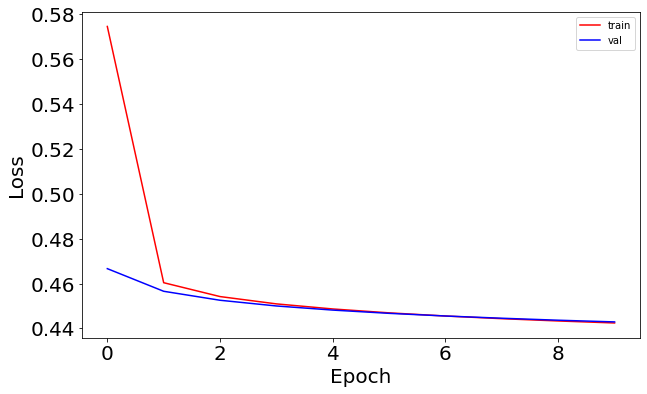

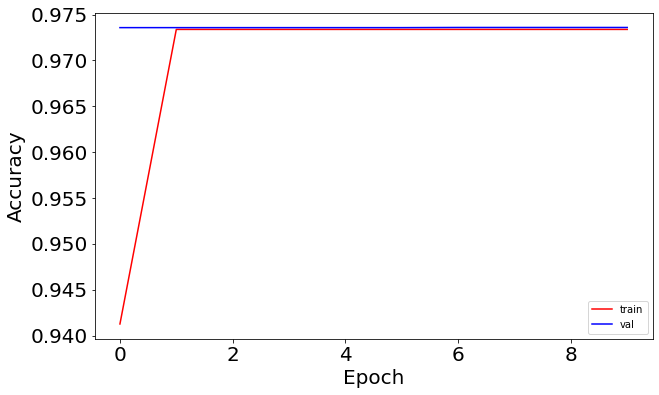

In [45]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model1_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model1_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model1_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(model1_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [46]:
y_pred1 = model1.predict(X_test)
score = model1.evaluate(X_test, y_test,verbose=1)

print(score)

907/907 [==============================] - 1s 576us/step - loss: 0.1962 - accuracy: 0.9479
[0.19617098569869995, 0.9478965401649475]


In [251]:
import tensorflow_addons as tfa

In [252]:
class nf_block(tf.keras.Model):
    def __init__(self,units,alpha=0.2,beta=1):
        super().__init__()
        
        self.nn = tfa.layers.WeightNormalization(
            tf.keras.layers.Dense(units,activation=None),data_init=False)
        #self.relu = tf.keras.activations.relu()
        self.alpha = alpha
        self.beta = beta
        self.skip_gain = self.add_weight(
            name="skip_gain",
            shape = (),
            initializer = "zeros",
            trainable = True,
            dtype = self.dtype)
        
    def call(self,inputs):
        shortcut = inputs
        
        x = inputs*self.beta
        x = self.nn(x)
        out = shortcut + x*self.alpha*self.skip_gain
        out = tf.keras.activations.relu(out)
        
        return out

In [303]:
class feedforward_nfnet(tf.keras.Model):
    def __init__(self,units = [94,64,64,64,64,1],alpha=0.2,beta=1.0):
        super().__init__()
        self.units = units
        self.alpha = alpha
        self.beta = beta
        self.expected_std = 1.0
        
        #self.input_layer = tf.keras.Input(shape=(self.units[0],))
        
        self.input_layer = tfa.layers.WeightNormalization(
            tf.keras.layers.Dense(self.units[1],activation='relu', input_shape=(self.units[0],)))
        
        self.beta = 1/(self.expected_std)
        self.layer1 = nf_block(self.units[2],alpha=self.alpha,beta=self.beta)
        self.expected_std = (self.expected_std **2 + self.alpha**2)**0.5
        
        self.beta = 1/(self.expected_std)
        self.layer2 = nf_block(self.units[3],alpha=self.alpha,beta=self.beta)
        self.expected_std = (self.expected_std **2 + self.alpha**2)**0.5
        
        self.beta = 1/(self.expected_std)
        self.layer3 = nf_block(self.units[4],alpha=self.alpha,beta=self.beta)
        self.expected_std = (self.expected_std **2 + self.alpha**2)**0.5
        
        self.final_layer = tfa.layers.WeightNormalization(
            tf.keras.layers.Dense(self.units[-1],activation="sigmoid"),data_init=False)
        
    def call(self, inputs):
        
        x = self.input_layer(inputs)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.final_layer(x)
        
        return x

In [304]:
def compute_norm(x, axis, keepdims):
    return tf.math.reduce_sum(x ** 2, axis=axis, keepdims=keepdims) ** 0.5

def unitwise_norm(x):
    if len(x.get_shape()) <= 1:  # Scalars and vectors
        axis = None
        keepdims = False
    elif len(x.get_shape()) in [2, 3]:  # Linear layers of shape IO or multihead linear
        axis = 0
        keepdims = True
    elif len(x.get_shape()) == 4:  # Conv kernels of shape HWIO
        axis = [0, 1, 2,]
        keepdims = True
    else:
        raise ValueError(f"Got a parameter with shape not in [1, 2, 4]! {x}")
    return compute_norm(x, axis, keepdims)


def adaptive_clip_grad(parameters, gradients, clip_factor=0.01,
                       eps=1e-3):
    new_grads = []
    for (params, grads) in zip(parameters, gradients):
        p_norm = unitwise_norm(params)
        max_norm = tf.math.maximum(p_norm, eps) * clip_factor
        grad_norm = unitwise_norm(grads)
        clipped_grad = grads * (max_norm / tf.math.maximum(grad_norm, 1e-6))
        new_grad = tf.where(grad_norm < max_norm, grads, clipped_grad)
        new_grads.append(new_grad)
    return new_grads

In [305]:
class AGCModel(tf.keras.Model):
    def __init__(self, model, clip_factor=0.01, eps=1e-3):
        super(AGCModel, self).__init__()
        self.model = model
        self.clip_factor = clip_factor
        self.eps = eps
    
    def train_step(self, data):
        images, labels = data
        print(data[0].shape,data[1].shape,type(data))

        with tf.GradientTape() as tape:
            predictions = self.model(images)
            loss = self.compiled_loss(labels, predictions)
        trainable_params = self.model.trainable_variables
        gradients = tape.gradient(loss, trainable_params)
        agc_gradients = adaptive_clip_grad(trainable_params, gradients, 
                                               clip_factor=self.clip_factor, eps=self.eps)
        self.optimizer.apply_gradients(zip(agc_gradients, trainable_params))

        self.compiled_metrics.update_state(labels, predictions)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        images, labels = data
        predictions = self.model(images, training=False)
        loss = self.compiled_loss(labels, predictions)
        self.compiled_metrics.update_state(labels, predictions)
        return {m.name: m.result() for m in self.metrics}

    def save_weights(self, filepath):
        self.model.save_weights(filepath=filepath)

    def call(self, inputs, *args, **kwargs):
        return self.model(inputs)

In [306]:
units = [94,64,64,64,64,1]

In [307]:
# class feedforward_nfnet(tf.keras.Model):
#     def __init__(self,units = [94,64,64,64,64,1],alpha=0.2,beta=1.0):
#         super().__init__()
#         self.units = units
#         self.alpha = alpha
#         self.beta = beta
#         self.expected_std = 1.0
        
#         #self.input_layer = tf.keras.Input(shape=(self.units[0],))
        
#         self.input_layer = tfa.layers.WeightNormalization(
#             tf.keras.layers.Dense(self.units[1],activation='relu', input_shape=(self.units[0],)))
        
#         self.beta = 1/(self.expected_std)
#         self.layer1 = nf_block(self.units[2],alpha=self.alpha,beta=self.beta)
#         self.expected_std = (self.expected_std **2 + self.alpha**2)**0.5
        
#         self.beta = 1/(self.expected_std)
#         self.layer2 = nf_block(self.units[3],alpha=self.alpha,beta=self.beta)
#         self.expected_std = (self.expected_std **2 + self.alpha**2)**0.5
        
#         self.beta = 1/(self.expected_std)
#         self.layer3 = nf_block(self.units[4],alpha=self.alpha,beta=self.beta)
#         self.expected_std = (self.expected_std **2 + self.alpha**2)**0.5
        
#         self.final_layer = tfa.layers.WeightNormalization(
#             tf.keras.layers.Dense(self.units[-1],activation="sigmoid"),data_init=False)
        
#     def call(self, inputs):
        
#         x = self.input_layer(inputs)
#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.layer3(x)
#         x = self.final_layer(x)
        
#         return x

In [313]:
model2 = feedforward_nfnet(units)
nf_model = AGCModel(model2)

In [314]:
nf_model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    ,loss="binary_crossentropy", metrics=["accuracy","AUC"]
)
# print(f"Total learnable parameters: {nf_model.model.count_params()/1e6} M")

In [315]:
# nf_model.summary()

In [316]:
batch_size = 64
epochs = 10
weights = {0:1, 1:1}

In [317]:
start = time.time()
history = nf_model.fit(X_train,y_train,batch_size=batch_size,
                   validation_data=(X_test,y_test),
                   epochs=epochs)
print(f"Total training time: {(time.time() - start)/60.} minutes")

Epoch 1/10
(None, 94) (None,) <class 'tuple'>
(None, 94) (None,) <class 'tuple'>
1869/1869 [==============================] - 6s 2ms/step - loss: 0.2022 - accuracy: 0.9459 - auc: 0.6942 - val_loss: 0.1870 - val_accuracy: 0.9478 - val_auc: 0.7365
Epoch 2/10
1869/1869 [==============================] - 4s 2ms/step - loss: 0.1838 - accuracy: 0.9483 - auc: 0.7466 - val_loss: 0.1841 - val_accuracy: 0.9478 - val_auc: 0.7531
Epoch 3/10
1869/1869 [==============================] - 4s 2ms/step - loss: 0.1800 - accuracy: 0.9489 - auc: 0.7572 - val_loss: 0.1829 - val_accuracy: 0.9479 - val_auc: 0.7597
Epoch 4/10
1869/1869 [==============================] - 4s 2ms/step - loss: 0.1799 - accuracy: 0.9485 - auc: 0.7627 - val_loss: 0.1843 - val_accuracy: 0.9479 - val_auc: 0.7545
Epoch 5/10
1869/1869 [==============================] - 4s 2ms/step - loss: 0.1811 - accuracy: 0.9477 - auc: 0.7680 - val_loss: 0.1828 - val_accuracy: 0.9479 - val_auc: 0.7613
Epoch 6/10
1869/1869 [============================

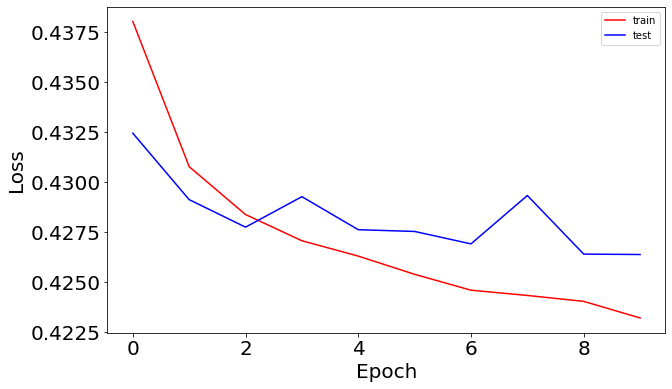

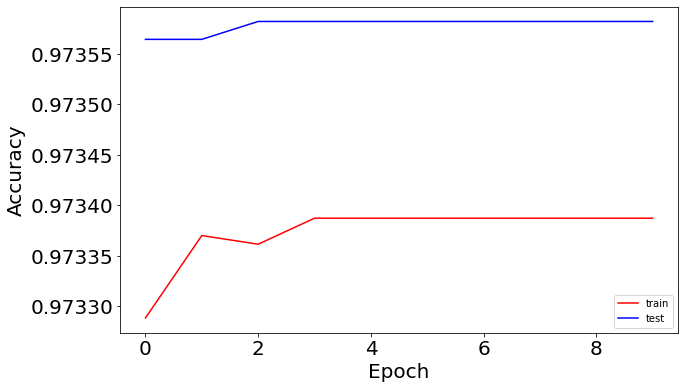

In [318]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']),'r',label='train')
ax.plot(np.sqrt(history.history['val_loss']),'b',label='test')
ax.set_xlabel(r"Epoch",fontsize=20)
ax.set_ylabel(r"Loss",fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(np.sqrt(history.history['accuracy']),'r',label='train')
ax.plot(np.sqrt(history.history['val_accuracy']),'b',label='test')
ax.set_xlabel(r"Epoch",fontsize=20)
ax.set_ylabel(r"Accuracy",fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)